<a href="https://colab.research.google.com/github/Kyamzzz/Data-Science-and-Machine-Learning-Projects/blob/main/A/B%20Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A/B Testing Project: Enhancing E-commerce Conversion Rates

## Project Overview

In this project, I will explore the efficacy of a newly designed e-commerce product page compared to the existing design. The primary objective is to determine if the new design leads to a statistically significant increase in user conversion rates, thereby helping the company make data-driven decisions about which design to implement.

## Hypothesis

I will conduct an A/B test to compare the conversion rates between the two designs under controlled conditions. Our hypotheses are formulated as follows:

- **Null Hypothesis (H₀)**: The conversion rate of the new design is equal to the conversion rate of the old design.
  - $H_0: p_{\text{new}} = p_{\text{old}}$
- **Alternative Hypothesis (Hₐ)**: The conversion border is different from that of the old design.
  - $H_a: p_{\text{new}} \neq p_{\text{old}}$

We will use a significance level (α) of 0.05, aiming for 95% confidence in our results.

## Methodology

### 1. Experimental Design
- **Control Group**: Users will see the existing product page (old design).
- **Treatment Group**: Users will see the redesigned product page (new design).
- Each group will be randomly selected to ensure unbiased results and to mitigate any external factors influencing user behavior.

### 2. Data Collection
- I will simulate the experiment using a dataset sourced from Kaggle, which includes user conversion results from a similar previous test.

### 3. Statistical Analysis
- I will perform statistical tests to compare the conversion rates of the two designs, utilizing Python libraries such as `pandas`, `numpy`, and `statsmodels`.
- The sample size will be calculated based on the desired power of the test (typically 0.8), ensuring sufficient detection of a practical difference if one exists.

### 4. Enhancements and Innovations
- **Advanced Analytics**: Implement Bayesian approaches or machine learning models to predict and analyze conversion probabilities.
- **Visualization Enhancements**: Use interactive graphs for a more dynamic presentation of results.
- **Segment Analysis**: Evaluate the effects of the new design on different user segments, providing deeper insights into its effectiveness across diverse user bases.

## Objectives
By the end of this project, I aim to:
- Validate or refute the initial hypotheses using robust statistical analysis.
- Offer clear, actionable insights to stakeholders on whether the new design should be adopted.
- Enhance reproducibility and educational value through thorough documentation of all steps and methodologies.




In [1]:
# Importing necessary libraries for data handling and analysis
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Set up matplotlib to display graphs inline in the Jupyter notebook
%matplotlib inline

# Setting the style for seaborn plots for better aesthetics
sns.set(style="whitegrid")




In [2]:
# Load the dataset from a CSV file
data = pd.read_csv('ab_data.csv')

# Display the first few rows of the dataframe to understand its structure
print(data.head())

# Check the dataframe for any missing values and overall info
print(data.info())


   user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB
None


In [8]:
# Check for any users that appear in both groups or with mismatched pages
pd.crosstab(data['group'], data['landing_page'])

# Remove all users who don't line up with their expected landing pages
data = data[((data['group'] == 'control') & (data['landing_page'] == 'old_page')) |
            ((data['group'] == 'treatment') & (data['landing_page'] == 'new_page'))]

# Check for and remove duplicate user_ids if present
if data['user_id'].duplicated().sum() > 0:
    data = data.drop_duplicates(subset='user_id')

# Final check on cleaned data
print(data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 290584 entries, 0 to 294477
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   user_id       290584 non-null  int64         
 1   timestamp     290584 non-null  datetime64[ns]
 2   group         290584 non-null  category      
 3   landing_page  290584 non-null  object        
 4   converted     290584 non-null  int64         
 5   date          290584 non-null  object        
dtypes: category(1), datetime64[ns](1), int64(2), object(2)
memory usage: 13.6+ MB
None


In [9]:
# Check the balance of sample sizes in each group
print(data['group'].value_counts())

# Calculate and display the conversion rate for each group as a sanity check
conversion_rates = data.groupby('group')['converted'].agg(['mean', 'count'])
print(conversion_rates)


group
treatment    145310
control      145274
Name: count, dtype: int64
               mean   count
group                      
control    0.120386  145274
treatment  0.118808  145310


<ipython-input-12-987d69017ebf>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='group', y='converted', data=data, ci=95)


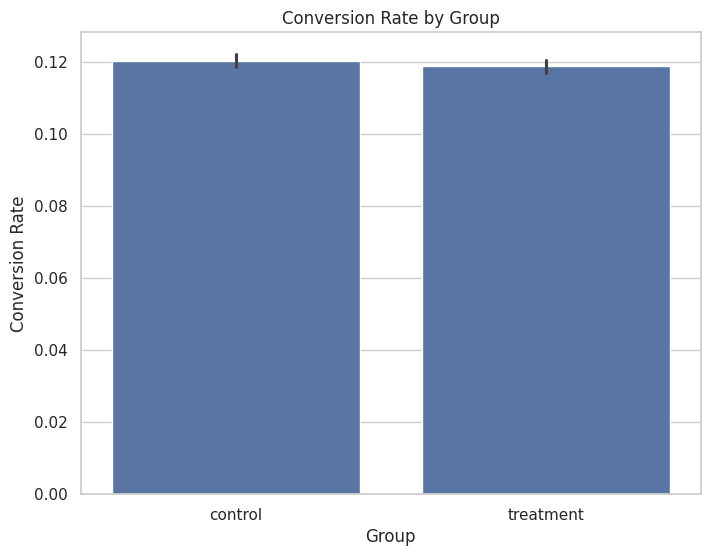

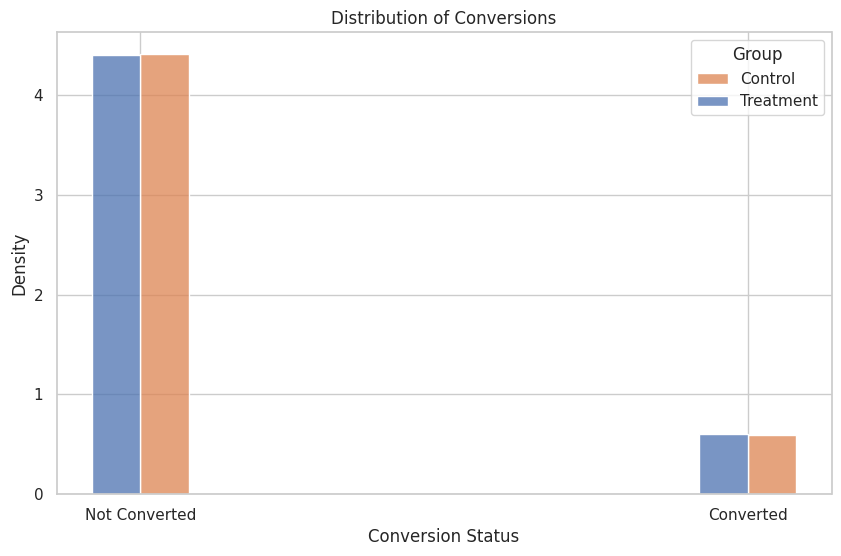

In [12]:
# Creating a bar plot for comparison of conversion rates between groups
plt.figure(figsize=(8, 6))
sns.barplot(x='group', y='converted', data=data, ci=95)
plt.title('Conversion Rate by Group')
plt.xlabel('Group')
plt.ylabel('Conversion Rate')
plt.show()

# Creating a histogram to visualize the distribution of conversions in both groups with clearer colors
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='converted', hue='group', multiple='dodge', shrink=0.8, bins=np.array([-0.1, 0.1, 0.9, 1.1]), stat='density', common_norm=False)
plt.title('Distribution of Conversions')
plt.xlabel('Conversion Status')
plt.ylabel('Density')
plt.xticks(ticks=[0, 1], labels=['Not Converted', 'Converted'])  # Set custom labels for x-axis
plt.legend(title='Group', labels=['Control', 'Treatment'])
plt.show()


## Hypothesis Testing

In [13]:
from statsmodels.stats.proportion import proportions_ztest

# Counts of successes for each group
successes = [data[data['group'] == 'control']['converted'].sum(), data[data['group'] == 'treatment']['converted'].sum()]

# Total observations in each group
nobs = [data[data['group'] == 'control']['converted'].count(), data[data['group'] == 'treatment']['converted'].count()]

# Perform the z-test
z_stat, p_value = proportions_ztest(successes, nobs)

# Output the test statistics and p-value
print(f'Z-statistic: {z_stat:.2f}')
print(f'P-value: {p_value:.3f}')

Z-statistic: 1.31
P-value: 0.190


## Conclusions from the Test:

Since the P-value (0.190) is greater than the common significance level of 0.05, we do not have sufficient evidence to reject the null hypothesis. This suggests that the difference in conversion rates between the control and treatment groups is not statistically significant.

Practical Implication: The lack of statistical significance implies that the new design (treatment) did not perform significantly differently from the old design (control) in terms of improving conversion rates. From a business perspective, this could mean that deploying the new design may not necessarily lead to the desired increase in conversions.